## Logistic Regression

**I used the Titanic Dataset, then trainning the model to predict of #Survivor using  #Sex_female and #Pclass features**

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv')


numrows = 891 


#This step just to Take the #Survived values as True and False instead of 0 and 1 

regression_df = pd.DataFrame({'Survivor':[True] * numrows})

#sort columns for convience
seq = ['Survivor']
regression_df = regression_df.reindex(columns=seq)


for z in range(numrows):
    #pull values from the dataframe
    Survived = df.iloc[z,1]
    
    regression_df.iat[z,0] = Survived

regression_df = regression_df.dropna() #exclude any r

regression_df.head(5)


#Join regression_df with the original and delete Survived column

df=df.join(regression_df)
df.drop(columns=['Survived'], axis=1, inplace=True)

df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


### Encode Categorical Features

In [166]:
#Encode Sex Feature

cat_vars = ['Sex']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)

    
df1.drop(columns=['Sex'], axis=1, inplace=True)

df1.head()


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,Sex_female,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,1,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,0,1


In [167]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x = df1[['Sex_female','Pclass']]
y = df1['Survivor']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [168]:
clf = linear_model.LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [169]:
#we can calculate the accuarcy using the score method
score = clf.score(X_train,y_train)
print(score)

0.7865168539325843


In [170]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(X_train)
cm = metrics.confusion_matrix(y_train, predictions)
print(cm)

[[376  63]
 [ 89 184]]


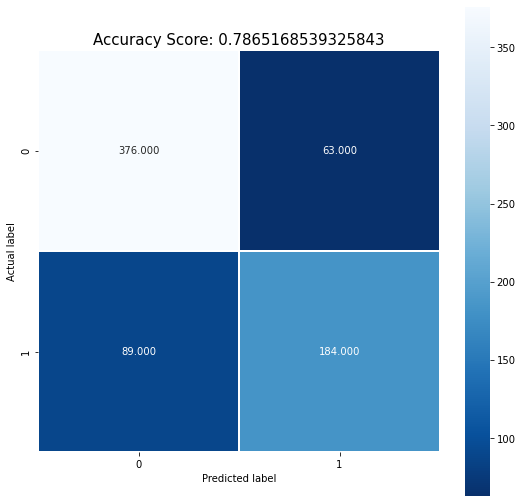

In [171]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);